<a href="https://colab.research.google.com/github/aryatomarAI/Natural-Language-Processing-with-python/blob/main/Deep-Learning-(-NLP-Project-)/Chat_Bots_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question and Answer Chat Bots
In this Project we will Build Q&A Chat bots which will study a story and when asked a question will reply in Yes or No according to the situation in the story.

## Data
We will use BaBi dataset of facebook for this project

Full Details: https://research.fb.com/downloads/babi/

## Algorithm 
We will use End-to-End Memory Networks for this project

Full Details: https://arxiv.org/abs/1503.08895

## Now let's load the data and import all the tools needed

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pickle

### load the training data 

In [3]:
with open("drive/MyDrive/train_qa.txt","rb") as f:
    train_data=pickle.load(f)

In [4]:
train_data[:6]

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

### load the testing data

In [5]:
with open("drive/MyDrive/test_qa.txt","rb") as f:
    test_data=pickle.load(f)

In [6]:
test_data[:6]

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

## Now let's try to grab the story part, question part and answer part from the data

In [9]:
train_data[0]  # This is the first item of the list

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
train_data[0][0]   # This the story part of the first item

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [11]:
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
train_data[0][1]   # This is the question part of the first item

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [13]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
train_data[0][2]  # This the answer part of the first item

'no'

**Note-** We have only to outcomes as an answer it's either yes or no

### Setting Up Vocabulary of All words

In [15]:
vocab=set()
all_data=train_data + test_data
len(all_data)

11000

In [16]:
for story,ques,ans in all_data: # As each element is sub divided into three section story,question and answer
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(ques))
vocab.add('no')
vocab.add("yes")
len(vocab)

37

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

### So we have found an vocabulary of 37 words 

In [18]:
vocab_len=len(vocab) +1  # we add 1 to provide an extra space to hold a 0 for keras pad_sequences

In [19]:
max_story_len=max([len(data[0]) for data in all_data])

In [20]:
max_story_len  # So maximum length of a story is 156

156

In [21]:
max_question_len=max([len(data[1]) for data in all_data])
max_question_len    # So maximum length of a question can be 6

6

### Vectorizing the data

In [22]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [23]:
# Create a tokenizer object
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'.': 8,
 '?': 18,
 'apple': 25,
 'back': 30,
 'bathroom': 33,
 'bedroom': 4,
 'daniel': 21,
 'discarded': 37,
 'down': 34,
 'dropped': 26,
 'football': 12,
 'garden': 19,
 'got': 22,
 'grabbed': 1,
 'hallway': 13,
 'in': 17,
 'is': 20,
 'john': 10,
 'journeyed': 29,
 'kitchen': 31,
 'left': 3,
 'mary': 23,
 'milk': 32,
 'moved': 2,
 'no': 9,
 'office': 28,
 'picked': 7,
 'put': 15,
 'sandra': 14,
 'the': 24,
 'there': 6,
 'to': 35,
 'took': 5,
 'travelled': 36,
 'up': 27,
 'went': 16,
 'yes': 11}

In [24]:
train_story_text=[]
train_ques_text=[]
train_ans_text=[]

for story,ques,ans in test_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
    train_ans_text.append(ans)

In [25]:
train_story_text[:2]

[['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.']]

In [26]:
## Let's create a function now for the above functionality
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    # X=stories
    X=[]
    
    # Xq=Question/Query
    Xq=[]
    
    # Y=Correct Answers
    Y=[]
    
    for story,ques,ans in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in ques]
        y=np.zeros(len(word_index) +1)
        y[word_index[ans]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [27]:
input_train,ques_train,ans_train=vectorize_stories(train_data)

In [28]:
input_train[:3]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        23,  2, 35, 24, 33,  8, 14, 29, 35, 24,  4,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       

In [29]:
ques_train[:3]

array([[20, 14, 17, 24, 13, 18],
       [20, 21, 17, 24, 33, 18],
       [20, 21, 17, 24, 28, 18]], dtype=int32)

In [30]:
ans_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [31]:
tokenizer.word_index["no"]

9

In [32]:
sum(ans_train)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       4988.,    0., 5012.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [33]:
input_test,ques_test,ans_test=vectorize_stories(test_data)

In [34]:
input_test.shape

(1000, 156)

In [35]:
input_train.shape

(10000, 156)

## Creating the Model

In [84]:
#import all the tools 
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import add,dot,concatenate
from keras.layers import Activation,Permute,Dense,Dropout,Input
from keras.layers import LSTM


**Placeholders for inputs**

In [85]:
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

### Building the Networks

### Encoders
Input get embedded to a sequence of vectors

**Input Encoder m**

In [86]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.35))
# (samples,max_story_len,embedding_dim)

### Input Encoder c

In [87]:
# Embed the input into a sequence of vectors of sixe_query_maxlen
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.35))
# (samples,story_max_len,question_maxLen)

### Question Encoder

In [88]:
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.35))
# (samples,question_len,embedding_dim)

### Encode Sequences

In [89]:
# Encode input sequences and questions
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [90]:
# Shape: (samples,story_max_len,question_max_len)
match=dot([input_encoded_m,question_encoded],axes=(2,2))

In [91]:
input_encoded_m.shape

TensorShape([None, 156, 64])

In [92]:
question_encoded.shape

TensorShape([None, 6, 64])

In [93]:
match.shape

TensorShape([None, 156, 6])

In [94]:
match=Activation("softmax")(match)

In [95]:
# add the matrix with second input vector sequence
response=add([match,input_encoded_c])

In [96]:
#We will permute to alter response dimensions
response=Permute((2,1))(response)

In [97]:
response.shape

TensorShape([None, 6, 156])

### Concatenate

In [98]:
# Concatenate the match matrix with question vector sequence
answer=concatenate([response,question_encoded])

In [100]:
answer.shape

TensorShape([None, 6, 220])

### Reduce with RNN(LSTM)

In [101]:
answer=LSTM(32)(answer)

In [102]:
answer.shape

TensorShape([None, 32])

In [103]:
#Regularization with dropout
answer=Dropout(0.35)(answer)

answer=Dense(vocab_len)(answer)

In [104]:
answer=Activation("softmax")(answer)

In [105]:
answer.shape

TensorShape([None, 38])

### Build the final model

In [106]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, None, 64)     2432        input_7[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 6, 64)        2432        input_8[0][0]                    
____________________________________________________________________________________________

## Train the Model

In [107]:
history=model.fit([input_train,ques_train],ans_train,batch_size=32,epochs=100,validation_data=([input_test,ques_test],ans_test))

Epoch 1/100
313/313 [==============================] - 6s 11ms/step - loss: 0.9786 - accuracy: 0.4941 - val_loss: 0.7045 - val_accuracy: 0.4970
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.7234 - accuracy: 0.5000 - val_loss: 0.6992 - val_accuracy: 0.4970
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.7059 - accuracy: 0.5027 - val_loss: 0.6961 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.7009 - accuracy: 0.5066 - val_loss: 0.6968 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6983 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6966 - accuracy: 0.5053 - val_loss: 0.6969 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6966 - accuracy: 0.4981 - val_loss: 0.6937 - val_accuracy:

### Saving The Model

In [108]:
filename=("drive/MyDrive/Model/chotbots_model_100_adam.h5")
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Evaluating the model

### Plotting out training history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


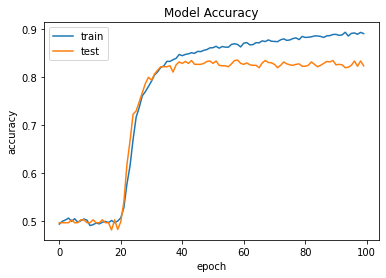

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.title("Model Accuracy")
plt.legend(["train","test"],loc='upper left')
plt.show()